**Theoretical**

1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to form a strong learner. It works by training models sequentially, where each new model tries to correct the errors made by the previous ones. The final prediction is a weighted combination of all models, resulting in improved accuracy and reduced bias.

2. How does Boosting differ from Bagging?

Boosting and Bagging are both ensemble methods but work differently. Bagging trains models independently in parallel on random subsets of data to reduce variance (e.g., Random Forest). Boosting, on the other hand, trains models sequentially where each new model learns from the mistakes of the previous ones, mainly reducing bias. Boosting focuses more on hard-to-predict examples, while bagging treats all samples equally.

3. What is the key idea behind AdaBoost?

The key idea behind AdaBoost (Adaptive Boosting) is to assign higher weights to misclassified samples so that the next weak learner focuses more on those difficult cases. It builds a sequence of models where each one improves upon the previous, and combines their outputs using weighted majority voting or weighted sum for final prediction.

4. Explain the working of AdaBoost with an example.

Suppose we are using AdaBoost with decision stumps (one-level decision trees) on a binary classification task. Initially, all training samples have equal weights. The first stump is trained and may misclassify some data. AdaBoost increases the weights of misclassified samples and decreases those of correctly classified ones. The next stump focuses more on the previously misclassified samples. This process repeats for several iterations. The final model aggregates all stumps’ predictions using their assigned weights (based on performance).

5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting is another boosting technique where models are added sequentially to minimize a loss function using gradient descent. Instead of reweighting samples like AdaBoost, Gradient Boosting fits new models to the residual errors of the previous ones. It's more flexible than AdaBoost because it can optimize various loss functions and work with both regression and classification problems.

6. What is the loss function in Gradient Boosting?

The loss function in Gradient Boosting depends on the task. For regression, it’s commonly Mean Squared Error (MSE); for classification, it can be Log Loss or Deviance. The model tries to minimize this loss function by fitting new learners to the negative gradient (residuals) of the loss with respect to the model's predictions.

7. How does XGBoost improve over traditional Gradient Boosting?

XGBoost (Extreme Gradient Boosting) enhances traditional Gradient Boosting in several ways:

Regularization to prevent overfitting.

Parallel processing for faster training.

Handling of missing values automatically.

Tree pruning based on max depth.

Efficient memory usage and scalability for large datasets.
These improvements make it faster, more accurate, and more suitable for real-world problems.

8. What is the difference between XGBoost and CatBoost?

XGBoost is efficient and widely used, but it needs manual preprocessing for categorical data. CatBoost, on the other hand, is designed to handle categorical variables automatically using techniques like Ordered Target Encoding. CatBoost also avoids prediction shift and is often easier to use when working with mixed data types, especially in business applications.

9. What are some real-world applications of Boosting techniques?

Boosting algorithms are used in:

Credit scoring and fraud detection in finance.

Customer churn prediction in telecom.

Click-through rate prediction in online advertising.

Medical diagnosis using patient data.

Ranking systems in search engines.
These applications benefit from Boosting's high accuracy and ability to handle complex patterns.

10. How does regularization help in XGBoost?

Regularization in XGBoost (using L1 and L2 penalties) helps control model complexity and prevents overfitting. By penalizing large weights and unnecessary splits, it ensures the model generalizes well to unseen data, improving stability and predictive performance.

11. What are some hyperparameters to tune in Gradient Boosting models?

Important hyperparameters include:

learning_rate: controls how much each tree contributes.

n_estimators: number of trees to be built.

max_depth: depth of individual trees.

subsample: fraction of samples used per tree.

min_samples_split and min_samples_leaf: control tree splits.

loss: defines the loss function to be minimized.
Tuning these helps balance model complexity and performance.

12. What is the concept of Feature Importance in Boosting?

Feature Importance in Boosting indicates how useful each feature is in predicting the target variable. It is calculated based on how frequently a feature is used in splits across all trees or the total gain it provides. It helps in feature selection and understanding the model’s decision-making process.

13. Why is CatBoost efficient for categorical data?

CatBoost handles categorical data internally using a method called Ordered Target Encoding, which avoids overfitting and data leakage. It doesn’t require manual encoding like one-hot or label encoding, and processes categorical features in a way that captures patterns more effectively, making it especially efficient for datasets with many non-numeric fields.

**Practical**

In [1]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = AdaBoostRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.7570781375679175


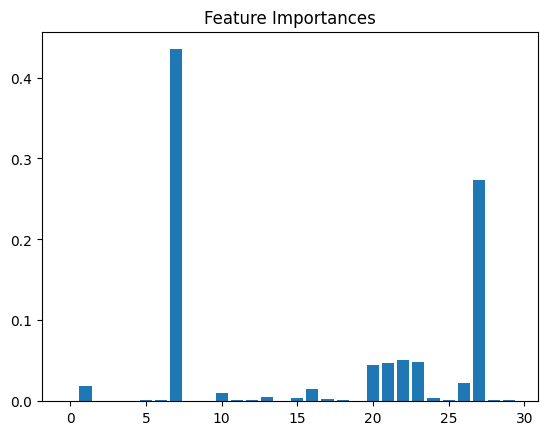

In [3]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.bar(range(X.shape[1]), clf.feature_importances_)
plt.title("Feature Importances")
plt.show()



In [4]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-Squared Score: {r2:.4f}")


R-Squared Score: 0.7756


In [5]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print("Gradient Boosting Accuracy:", gb_acc)
print("XGBoost Accuracy:", xgb_acc)

Gradient Boosting Accuracy: 0.956140350877193
XGBoost Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [20]:
# 19. Train a CatBoost Classifier and evaluate using F1-Score
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, pred))

F1 Score: 0.9790209790209791


In [7]:
# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))

MSE: 0.2225899267544737


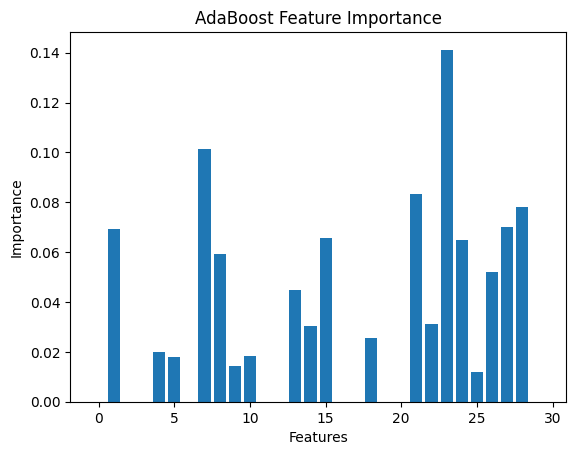

In [8]:
# 21. Train an AdaBoost Classifier and visualize feature importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier()
model.fit(X_train, y_train)

plt.bar(range(X.shape[1]), model.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importance")
plt.show()

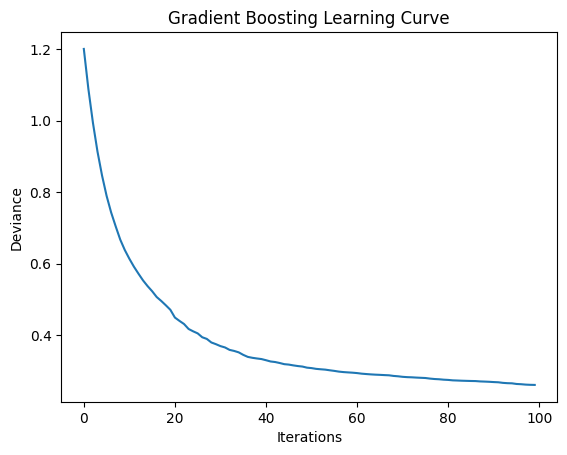

In [9]:
# 22. Train a Gradient Boosting Regressor and plot learning curves
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

plt.plot(model.train_score_)
plt.xlabel("Iterations")
plt.ylabel("Deviance")
plt.title("Gradient Boosting Learning Curve")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


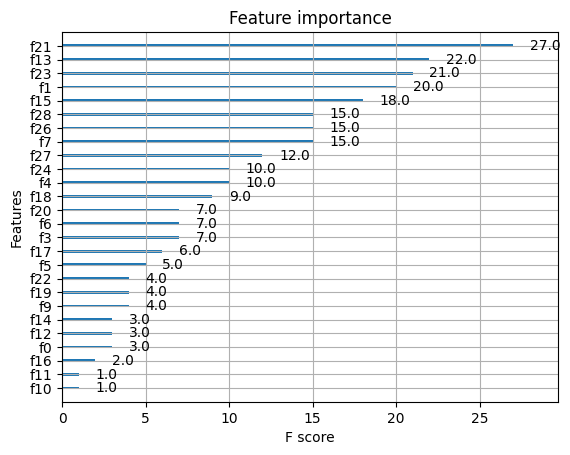

In [10]:
# 23. Train an XGBoost Classifier and visualize feature importance
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

plot_importance(model)
plt.show()

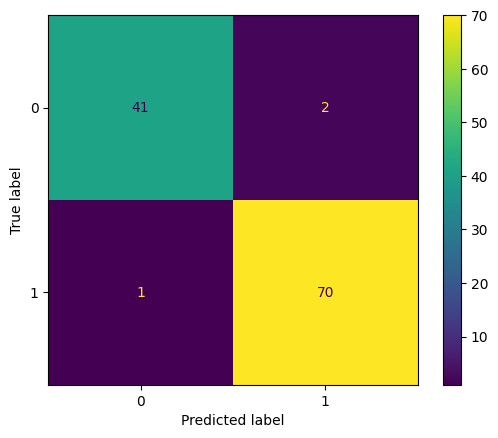

In [19]:
# 24. Train a CatBoost Classifier and plot the confusion matrix
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [12]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n}, Accuracy={acc}")

n_estimators=10, Accuracy=0.9649122807017544
n_estimators=50, Accuracy=0.9649122807017544
n_estimators=100, Accuracy=0.9736842105263158
n_estimators=200, Accuracy=0.9736842105263158


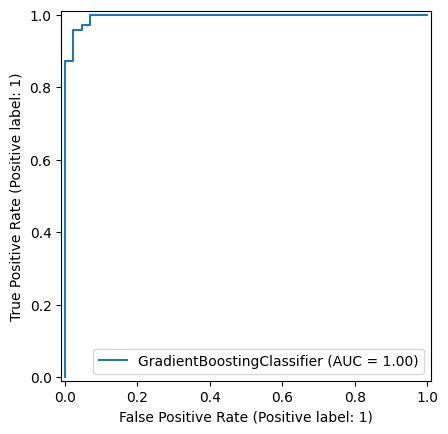

In [13]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [15]:
# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
param_grid = {'learning_rate': [0.01, 0.1, 0.2]}
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_['learning_rate'])

Best Learning Rate: 0.2


In [16]:
# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_weighted = CatBoostClassifier(class_weights=[1, 10], verbose=0)
model_weighted.fit(X_train, y_train)

pred = model_weighted.predict(X_test)
print("F1 Score (weighted):", f1_score(y_test, pred))

F1 Score (weighted): 0.7391304347826086


In [17]:
# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for lr in [0.01, 0.1, 1]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning Rate={lr}, Accuracy={acc}")

Learning Rate=0.01, Accuracy=0.9385964912280702
Learning Rate=0.1, Accuracy=0.956140350877193
Learning Rate=1, Accuracy=0.9649122807017544


In [18]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from xgboost import XGBClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, probs))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:29:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log Loss: 0.0885952270211478
